In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import pickle
from sklearn.metrics import classification_report,confusion_matrix

plt.style.use('fivethirtyeight')


In [9]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_ac4ae00215fd46288be593d83ddbe528 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gx1UZMzT-nJ08E16hDKvC3cbFfgGV10Vo51QiXQQTELF',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

body = client_ac4ae00215fd46288be593d83ddbe528.get_object(Bucket='employeepromotionprediction-donotdelete-pr-cdsyvyuo6z1r19',Key='emp_promotion.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [10]:
data

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0


In [11]:
data.shape

(54808, 14)

In [12]:
data.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


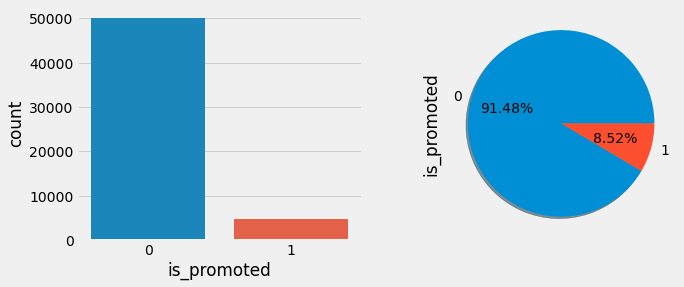

In [13]:
# Data is imbalanced

plt.figure(figsize=(10,4))
plt.subplot(121)
sns.countplot(data['is_promoted'])      
plt.subplot(122)
data['is_promoted'].value_counts().plot(kind='pie',autopct = '%.2f%%',shadow=True)
plt.show()

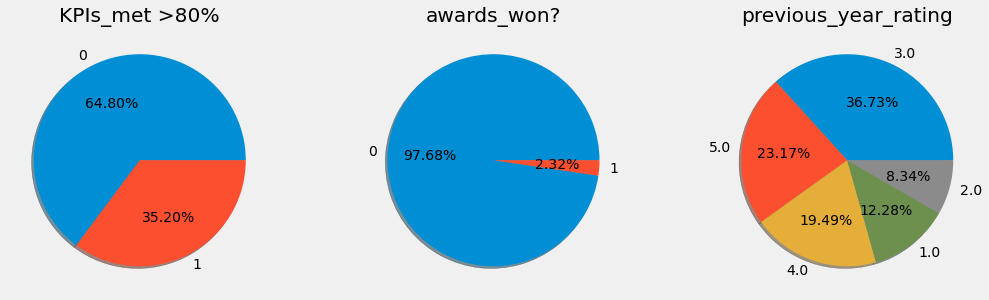

In [14]:
plt.figure(figsize=(16,10))
plt.subplot(231)
plt.axis('off')
plt.title('KPIs_met >80%')
data['KPIs_met >80%'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(232)
plt.axis('off')
plt.title('awards_won?')
data['awards_won?'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.subplot(233)
plt.axis('off')
plt.title('previous_year_rating')
data['previous_year_rating'].value_counts().plot(kind='pie',shadow=True,autopct = '%.2f%%')
plt.show()

<AxesSubplot:xlabel='avg_training_score'>

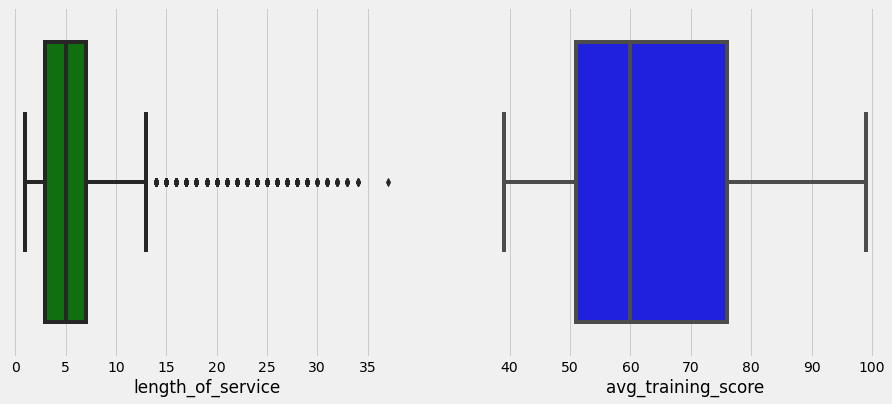

In [15]:
plt.figure(figsize=(14,6))
plt.subplot(121)
sns.boxplot(data['length_of_service'],color='g')
plt.subplot(122)
sns.boxplot(data['avg_training_score'],color='b')

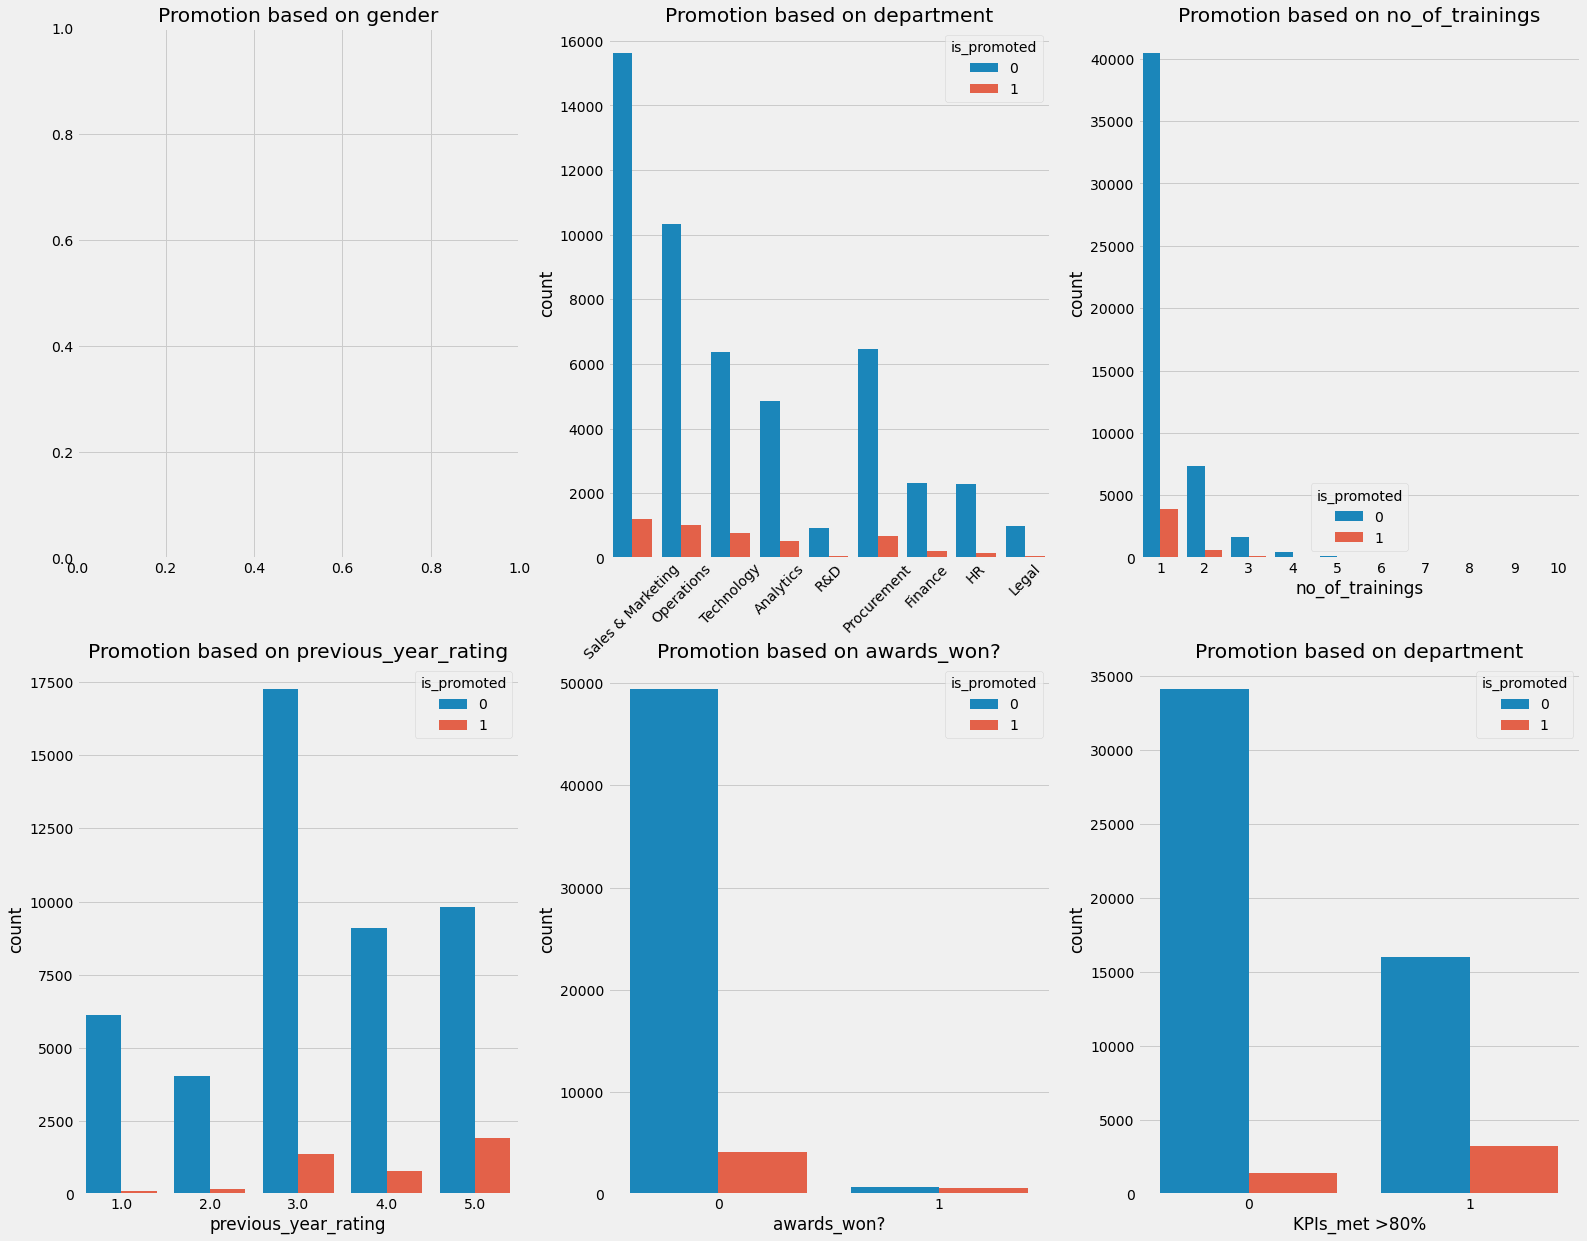

In [16]:
plt.figure(figsize=(24,20))
plt.subplot(231)
#sns.countplot(data['gender'],hue=data['is_promoted'])
plt.title('Promotion based on gender')
plt.subplot(232)
plt.xticks(rotation=45)
sns.countplot(data['department'],hue=data['is_promoted'])
plt.title('Promotion based on department')
plt.subplot(233)
sns.countplot(data['no_of_trainings'],hue=data['is_promoted'])
plt.title('Promotion based on no_of_trainings')
plt.subplot(234)
sns.countplot(data['previous_year_rating'],hue=data['is_promoted'])
plt.title('Promotion based on previous_year_rating')
plt.subplot(235)
sns.countplot(data['awards_won?'],hue=data['is_promoted'])
plt.title('Promotion based on awards_won?')
plt.subplot(236)
sns.countplot(data['KPIs_met >80%'],hue=data['is_promoted'])
plt.title('Promotion based on department')
plt.show()

<AxesSubplot:xlabel='avg_training_score', ylabel='previous_year_rating'>

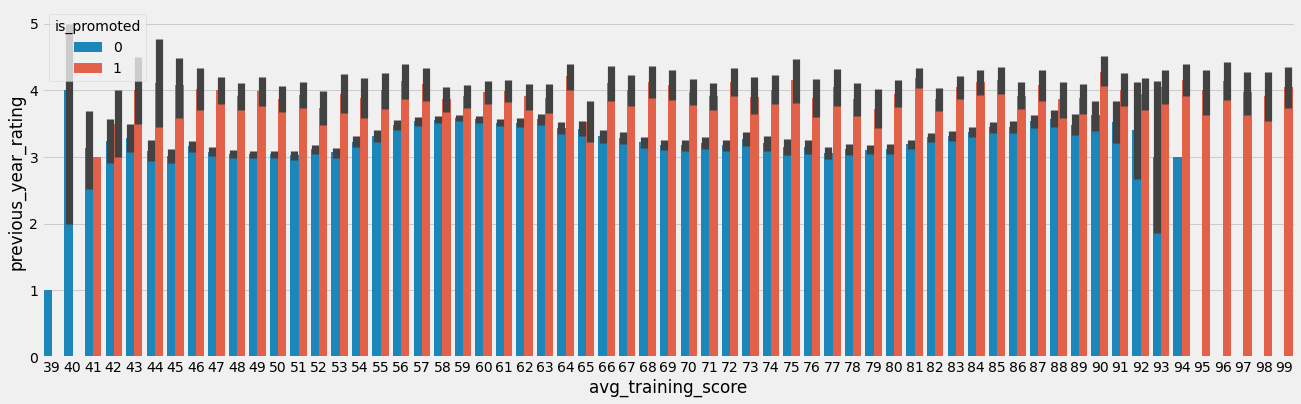

In [17]:
plt.figure(figsize=(20,6))
sns.barplot(data['avg_training_score'],data['previous_year_rating'],data['is_promoted'])

#### Drop Unwanted Stuff

In [18]:
data.drop(['employee_id','gender','region','recruitment_channel'],axis=1,inplace=True)

In [19]:
data

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,Master's & above,1,35,5.0,8,1,0,49,0
1,Operations,Bachelor's,1,30,5.0,4,0,0,60,0
2,Sales & Marketing,Bachelor's,1,34,3.0,7,0,0,50,0
3,Sales & Marketing,Bachelor's,2,39,1.0,10,0,0,50,0
4,Technology,Bachelor's,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...
54803,Technology,Bachelor's,1,48,3.0,17,0,0,78,0
54804,Operations,Master's & above,1,37,2.0,6,0,0,56,0
54805,Analytics,Bachelor's,1,27,5.0,3,1,0,79,0
54806,Sales & Marketing,NaN,1,29,1.0,2,0,0,45,0


#### Checking for null

In [20]:
data.isnull().sum()

department                 0
education               2409
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [21]:
print(data["education"].value_counts())

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64


In [22]:
mv=data[data["education"].isnull()].index.tolist()
data.drop(mv, axis=0, inplace=True)

In [23]:
data.isnull().sum()

department                 0
education                  0
no_of_trainings            0
age                        0
previous_year_rating    3739
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [24]:
print(data["previous_year_rating"].value_counts())

3.0    17867
5.0    11362
4.0     9509
1.0     5887
2.0     4035
Name: previous_year_rating, dtype: int64


In [25]:
data["previous_year_rating"]=data["previous_year_rating"].fillna(data["previous_year_rating"].mode()[0])

In [26]:
negative=data[(data['KPIs_met >80%']==0) & (data['awards_won?']==0) & (data['previous_year_rating']==1.0) & (data['is_promoted']==1) & (data['avg_training_score']<60)]

In [27]:
negative

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
31860,Sales & Marketing,Bachelor's,1,27,1.0,2,0,0,58,1
51374,Sales & Marketing,Bachelor's,1,31,1.0,5,0,0,58,1


In [28]:
data.drop(index=[31860,51374],inplace=True)

In [29]:
q1=np.quantile(data["length_of_service"],0.25)
q3=np.quantile(data["length_of_service"],0.75)

IQR= q3-q1

ub=(1.5*IQR)+q3
lb=(1.5*IQR)-q1


In [30]:
print("q1" ,q1)
print('q3 :',q3)
print('IQR :',IQR)
print('Upper bound :',ub)
print('Lower bound :',lb)
print ('skewed data : ',len(data[data[ 'length_of_service' ]>ub]))

q1 3.0
q3 : 8.0
IQR : 5.0
Upper bound : 15.5
Lower bound : 4.5
skewed data :  2298


In [31]:
print ('skewed data : ',len(data[data[ 'length_of_service' ]>ub]))

skewed data :  2298


In [32]:
pd.crosstab([data['length_of_service']>ub],data['is_promoted'])

is_promoted,0,1
length_of_service,,
False,45716,4383
True,2137,161


In [33]:
data['length_of_service']=[ub if x>ub else x for x in data['length_of_service']]

In [34]:
data[ 'education' ].isnull()


0        False
1        False
2        False
3        False
4        False
         ...  
54802    False
54803    False
54804    False
54805    False
54807    False
Name: education, Length: 52397, dtype: bool

In [35]:
data['education']=data['education'].replace(("Below Secondary", "Bachelor's","Master's & above"),(1,2,3))

In [36]:
data[ 'education' ]

0        3
1        2
2        2
3        2
4        2
        ..
54802    2
54803    2
54804    3
54805    2
54807    2
Name: education, Length: 52397, dtype: int64

In [37]:
lb = LabelEncoder()
data['department']=lb.fit_transform(data['department'])

##### spliting and resampling

In [38]:
x=data.drop('is_promoted',axis=1)
y = data['is_promoted']
print(x.shape)
print(y.shape)

(52397, 9)
(52397,)


In [39]:
x

,department,education,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,7,3,1,35,5.0,8.0,1,0,49
1,4,2,1,30,5.0,4.0,0,0,60
2,7,2,1,34,3.0,7.0,0,0,50
3,7,2,2,39,1.0,10.0,0,0,50
4,8,2,1,45,3.0,2.0,0,0,73
...,...,...,...,...,...,...,...,...,...
54802,7,2,2,31,1.0,2.0,0,0,49
54803,8,2,1,48,3.0,15.5,0,0,78
54804,4,3,1,37,2.0,6.0,0,0,56
54805,0,2,1,27,5.0,3.0,1,0,79


In [42]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)

In [45]:
print('Shape of x_train {}'.format(x_train.shape))
print('Shape of y_train {}'.format(y_train.shape))
print('Shape of x_test {}'.format(x_test.shape))
print('Shape of y_test {}'.format(y_test.shape))


Shape of x_train (36677, 9)
Shape of y_train (36677,)
Shape of x_test (15720, 9)
Shape of y_test (15720,)


In [46]:
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
yPred = rf.predict(x_test)

In [47]:
pickle.dump(rf,open('model.pkl','wb'))

In [48]:
!tar -zcvf employee-promotion-model_new.tgz model.pkl

model.pkl


In [49]:
ls -1

employee-promotion-model_new.tgz
model.pkl


In [50]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 28.7 MB/s eta 0:00:01


In [51]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "tO2_3DRl4UbNH9hZzRwmbp3pqdJYb7bsfBnzif10rJ6R"
}
client = APIClient(wml_credentials)

In [52]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    #print(space)
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [56]:
space_uid = guid_from_space_name(client, space_name='EmployeeDeployment')
print("Space UID = " + space_uid)

Space UID = 78ceaca7-5b3e-43c6-bad3-34c8324a7809


In [59]:
client.set.default_space(space_uid)

'SUCCESS'

In [60]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
runtime-22.1-py3.9             12b83a17-24d8-5082-900f-0ab31fbfd3cb  base
scikit-learn_0.22-py3.6        154010f

In [61]:
software_spec_uid= client.software_specifications.get_uid_by_name("default_py3.8")
software_spec_uid

'ab9e1b80-f2ce-592c-a7d2-4f2344f77194'

In [62]:
model_details = client.repository.store_model(model='employee-promotion-model_new.tgz',
                                              meta_props={client.repository.ModelMetaNames.NAME:"EmployeeDeployment",
                                                          client.repository.ModelMetaNames.TYPE:"scikit-learn_0.23",
                                                          client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
                                                          },
                                              training_data=x_train,
                                              training_target=y_train)
                                                 

In [63]:
model_id = client.repository.get_model_id(model_details)
model_id

'a5deb338-625f-435c-acde-3f0d2afd03a8'

In [64]:
deployment = client.deployments.create(
    artifact_uid=model_id, 
    meta_props={client.deployments.ConfigurationMetaNames.NAME:"Employee_deploy", 
    client.deployments.ConfigurationMetaNames.ONLINE: {}
})



#######################################################################################

Synchronous deployment creation for uid: 'a5deb338-625f-435c-acde-3f0d2afd03a8' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='a70ae845-cc08-46dd-b178-6e8f5e0a525a'
------------------------------------------------------------------------------------------------


